## Input Variables:

* fixed acidity: most acids involved with wine or fixed or nonvolatile
* volatile acidity: the amount of acetic acid in wine
* citric acid: found in small quantities, citric acid can add 'freshness' and  flavor to wines
* residual sugar: the amount of sugar remaining after fermentation stops
* chlorides: the amount of salt in the wine
* free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
* total sulfur dioxide: amount of free and bound forms of S02
* density: the density of water is close to that of water depending on the percent alcohol and sugar content
* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
* sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
* alcohol: the percent alcohol content of the wine
## Output Variable:

* quality: output variable (based on sensory data, score between 0 and 10)

# Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',delimiter = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Checking the missing values

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* there is no missing value present in the dataset

In [9]:
df.shape

(1599, 12)

* in the dataset ,there are 1599 observations and 12 columns.

In [10]:
df['quality'].nunique()

6

## EDA (Exploratory Data Analysis)

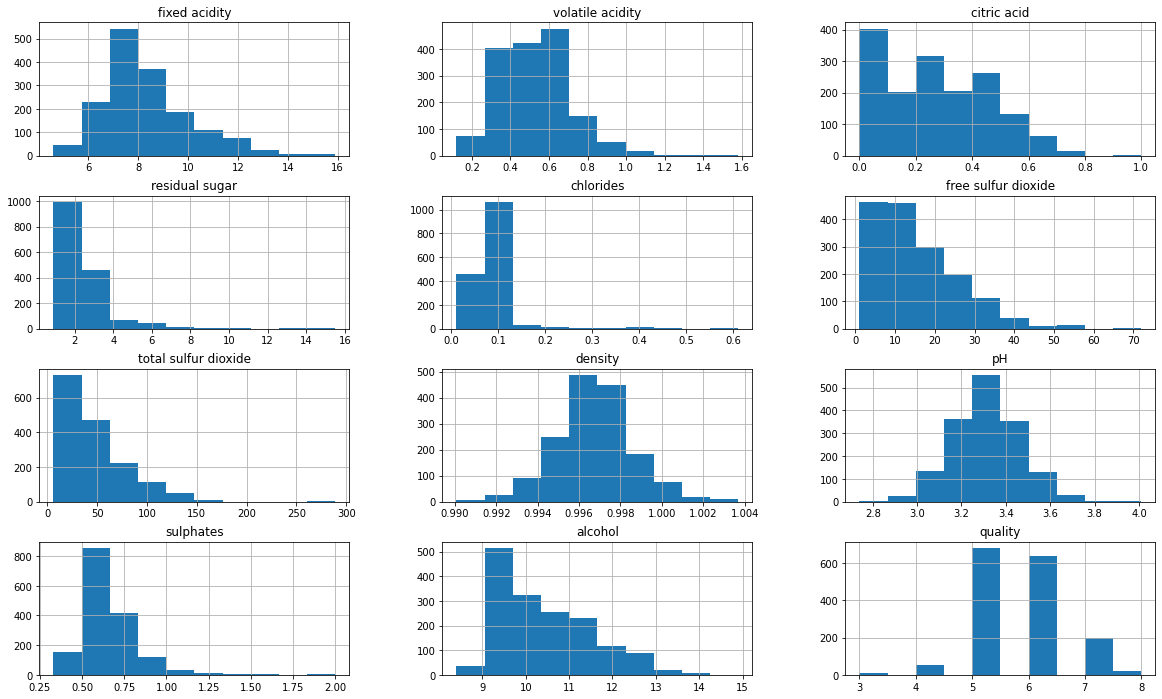

In [11]:
df.hist(figsize = (20,12))
plt.show()

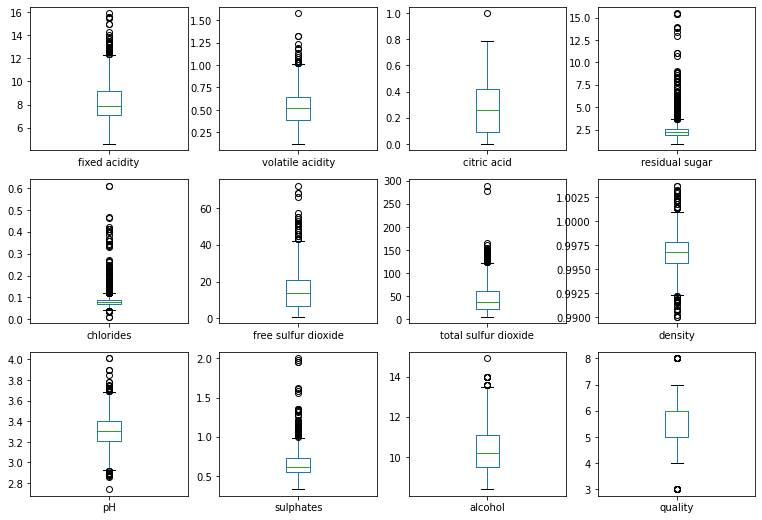

In [12]:
df.plot(kind = 'box', subplots = True ,layout = (3,4),figsize = (13,9),sharex = False , sharey= False)
plt.show()


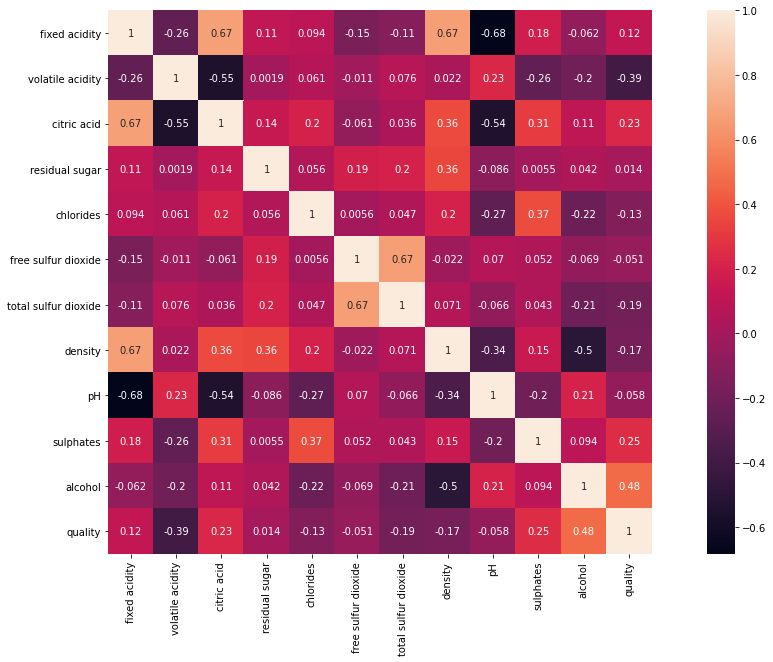

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), square = True , annot = True)
plt.show()


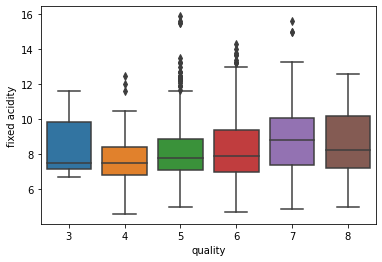

In [14]:
sns.boxplot('quality','fixed acidity',data=df)
plt.show()

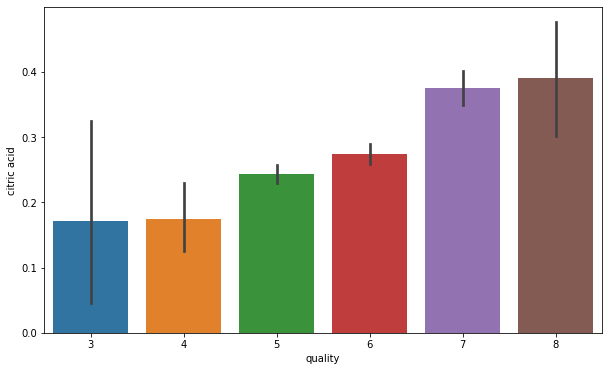

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

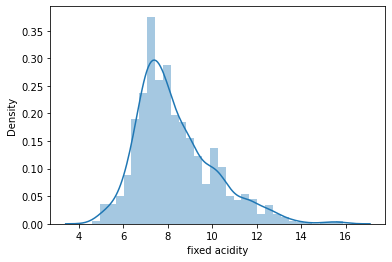

In [16]:
sns.distplot(df['fixed acidity'])
plt.show()

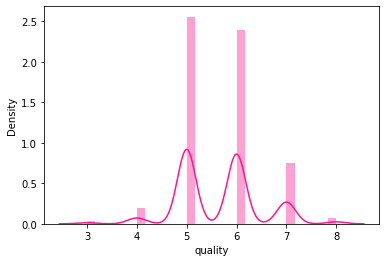

In [17]:
sns.distplot( df['quality'] , color = 'deeppink')
plt.show()

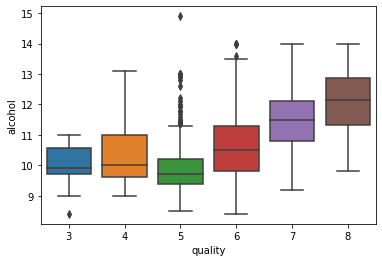

In [18]:
sns.boxplot('quality','alcohol',data=df)
plt.show()

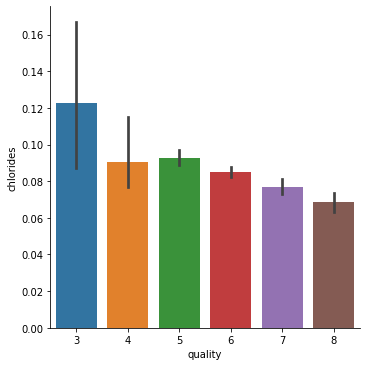

In [19]:
sns.factorplot(x='quality', y = 'chlorides',kind = 'bar',data= df)
plt.show()

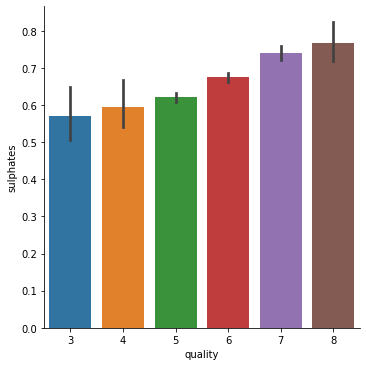

In [20]:
sns.factorplot(x='quality', y = 'sulphates',kind = 'bar',data= df)
plt.show()

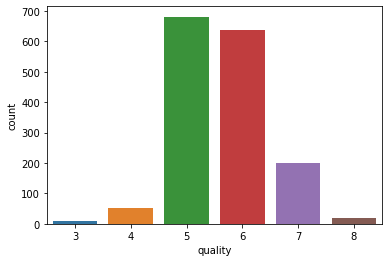

In [21]:
sns.countplot(x = 'quality',data = df)
plt.show()

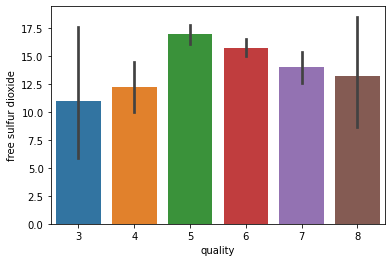

In [22]:
sns.barplot(x = 'quality' , y = 'free sulfur dioxide', data = df)
plt.show()

# Outliers Treatment

In [23]:
df.drop(df[(df['fixed acidity']>12) ].index, inplace=True)


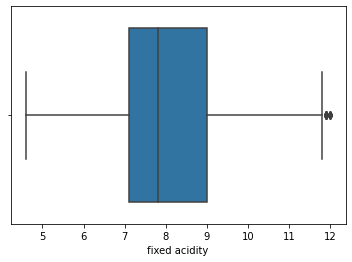

In [24]:
sns.boxplot(df['fixed acidity'])

In [25]:
df.drop(df[(df['volatile acidity']>1)].index, inplace = True)


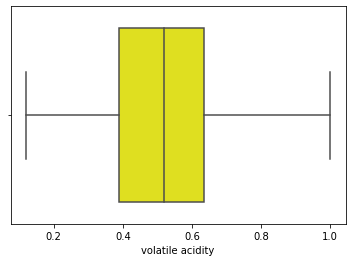

In [26]:
sns.boxplot(df['volatile acidity'],color = 'yellow')

In [27]:
df.drop(df[(df['free sulfur dioxide']>40) ].index, inplace=True)


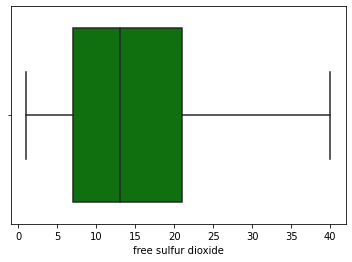

In [28]:
sns.boxplot(df['free sulfur dioxide'],color = 'green')

In [29]:
df.drop(df[(df['total sulfur dioxide']>100) ].index, inplace=True)


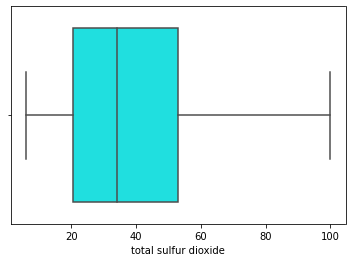

In [30]:
sns.boxplot(df['total sulfur dioxide'],color = 'cyan')

In [31]:
df.drop(df[(df['sulphates']>1.0) ].index, inplace=True)

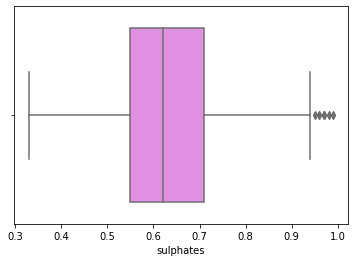

In [32]:
sns.boxplot(df['sulphates'] , color = 'violet')

In [33]:
df.drop(df[(df['residual sugar']>3) ].index, inplace=True)

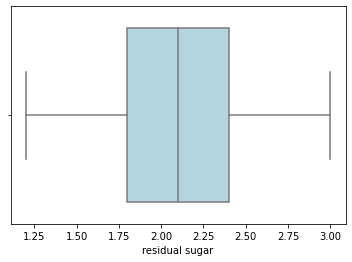

In [34]:
sns.boxplot(df['residual sugar'] , color = 'lightblue')

## Drop Irrelevant Columns

In [35]:
df.drop(['chlorides'] , axis = 1 , inplace = True)
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,25.0,67.0,0.9968,3.20,0.68,9.8,5


# Build The Model

In [36]:
X = df.drop(['quality'],axis = 1)
y = df['quality']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

#Logistic Regression Model
We will make a logistics regression model to predict the quality of wine using input variables. First we will split our dataset into training and testing sets and then create a logistic regression model using the training set.

In [38]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X , y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_train , y_train_pred)

0.5488636363636363

In [42]:
accuracy_score(y_test,y_test_pred)

0.6190476190476191

## Visualising Results

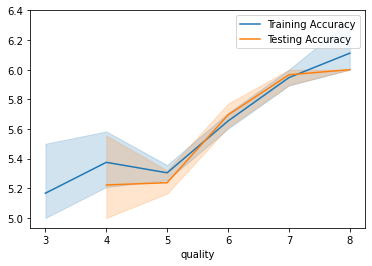

In [43]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')

## Decision Tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [46]:
print('accuracy on training data: ',accuracy_score(y_train , y_train_pred))
print('accuracy on testing data: ',accuracy_score(y_test,y_test_pred))

accuracy on training data:  0.8715909090909091
accuracy on testing data:  0.891156462585034


## Visualising Results

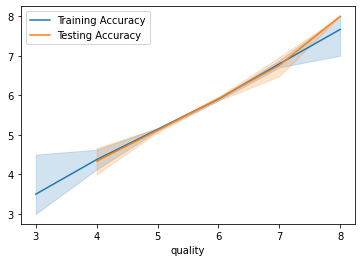

In [47]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')